# Запуск локальной сети

docker run --gpus=all -p 127.0.0.1:9000:8080 us-docker.pkg.dev/colab-images/public/runtime

# Разархивируем файлы с данными


In [ ]:
import os  # Импорт библиотеки для работы с операционной системой
from google.colab import files
import shutil
import zipfile
!pip install gdown
import gdown
def exist(filepath):
  if not os.path.exists(file_path):
    return True
  return False
def create_dirtree(dirname, name1, name2):
    os.makedirs(dirname)
    os.makedirs(os.path.join(dirname, name1))
    os.makedirs(os.path.join(dirname, name2))
def create_folders_if_not_exist():
    data_folder = '/content/my_data'

    train_data_folder = os.path.join(data_folder, 'Train')
    val_data_folder = os.path.join(data_folder, 'Val')
    test_data_folder = os.path.join(data_folder, 'Test')
    model_data_folder = os.path.join(data_folder, 'Models')

    if not os.path.exists(data_folder):
        os.makedirs(data_folder)

    if not os.path.exists(train_data_folder):
        create_dirtree(train_data_folder, "woman", "man")

    if not os.path.exists(val_data_folder):
        create_dirtree(val_data_folder, "woman", "man")

    if not os.path.exists(test_data_folder):
        create_dirtree(test_data_folder, "woman", "man")

    if not os.path.exists(model_data_folder):
        os.makedirs(model_data_folder)


create_folders_if_not_exist()

# Путь к папке, куда нужно переместить архив
destination_folder = '/content'

# Имя архива
archive_name = 'GenderData.zip'

# Путь к целевой папке, куда нужно разархивировать архив
extract_folder = '/content/my_data'
if not os.path.exists(archive_name):
  gdown.download('https://drive.google.com/uc?id=1EcExF7G5HOMAvZ6IZW509jivTn56uuBB')
if not os.path.exists("/my_data/GenderData"):
      # Копируем архив в другую папку
      shutil.copy(os.path.join(destination_folder, archive_name), extract_folder)
      # Разархивируем архив в целевой папке
      with zipfile.ZipFile(os.path.join(extract_folder, archive_name), 'r') as zip_ref:
          zip_ref.extractall(extract_folder)

# Создаем train, val, test

In [ ]:
import shutil
import os
from pathlib import Path
import random
def clear_befor_upload(dirname):
  os.system(f'rm -rf {dirname + "/man/*"}')
  os.system(f'rm -rf {dirname + "/woman/*"}')
def calculate_percentages(num1, num2, per1, per2, per3):
    val1_m = round(num1 * per1 / 100)
    val2_m = round(num1 * per2 / 100)
    val3_m = round(num1 * per3 / 100)
    # Корректируем последнее значение, чтобы сумма была равна исходному числу
    val3_m = num1 - val1_m - val2_m

    val1_w = round(num2 * per1 / 100)
    val2_w  = round(num2 * per2 / 100)
    val3_w  = round(num2 * per3 / 100)
    # Корректируем последнее значение, чтобы сумма была равна исходному числу
    val3_w  = num2 - val1_w  - val2_w

    arr_train = [val1_m, val1_w]
    arr_val = [val2_m, val2_w]
    arr_test = [val3_m, val3_w]
    return arr_train, arr_val, arr_test

def count_files_in_directory(directory):
    return len(list(Path(directory + "/woman").rglob('*.*'))) + len(list(Path(directory + "/man").rglob('*.*')))

def move_images(num_files, source_dir, target_dir):
    files_of_man = os.listdir(source_dir + "/man")
    files_of_woman = os.listdir(source_dir + "/woman")
    # Перемешиваем список файлов
    random.shuffle(files_of_man)
    random.shuffle(files_of_woman)
    num_files_man = num_files[0]
    num_files_woman = num_files[1]
    for i in range(num_files_man):
        shutil.move(os.path.join(source_dir + "/man", files_of_man[i]), os.path.join(target_dir + "/man", files_of_man[i]))
    for i in range(num_files_woman):
        shutil.move(os.path.join(source_dir + "/woman", files_of_woman[i]), os.path.join(target_dir+ "/woman", files_of_woman[i]))

data_dir = "my_data/GenderData"
# Каталог с данными для обучения
train_dir = 'my_data/Train'
# Каталог с данными для проверки
val_dir = 'my_data/Val'
# Каталог с данными для тестирования
test_dir = 'my_data/Test'

#Очистка папок для новых файлов
clear_befor_upload(train_dir)
clear_befor_upload(val_dir)
clear_befor_upload(test_dir)

# Количество элементов данных в одном классе
num_images_man = count_files_in_directory(data_dir) - len(list(Path(data_dir + "/woman").rglob('*.*')))
num_images_woman = count_files_in_directory(data_dir) - len(list(Path(data_dir + "/man").rglob('*.*')))

num_of_train_data = 60 # Значение в процентах
num_of_val_data = 10 # Значение в процентах
num_of_test_data = 30 # Значение в процентах
info_str = f"num_of_train_data = {num_of_train_data}%\nnum_of_val_data = {num_of_val_data}%\nnum_of_test_data = {num_of_test_data}%\n"

num_of_train_data, num_of_val_data, num_of_test_data = calculate_percentages(num_images_man, num_images_woman, num_of_train_data, num_of_val_data, num_of_test_data)

move_images(num_of_train_data, data_dir, train_dir)
move_images(num_of_val_data, data_dir, val_dir)
move_images(num_of_test_data, data_dir, test_dir)
print(count_files_in_directory(train_dir))
print(count_files_in_directory(val_dir))
print(count_files_in_directory(test_dir))



14465
2409
7233


# Подготовка данных для тестирования и обучения

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1. / 255)
train_dir = "/content/my_data/Train"
val_dir = "/content/my_data/Val"
test_dir = "/content/my_data/Test"
# Размеры изображения
img_width, img_height = 224, 224
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width,
               img_height,
               3)
# Размер мини-выборки
batch_size = 20
info_str += f"batch_size = {batch_size}\n"
# Количество изображений для обучения
nb_train_samples = count_files_in_directory(train_dir)
# Количество изображений для проверки
nb_validation_samples = count_files_in_directory(val_dir)
# Количество изображений для тестирования
nb_test_samples = count_files_in_directory(test_dir)

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size = (img_width, img_height),
                                              batch_size = batch_size,
                                              class_mode = 'binary')

val_generator = datagen.flow_from_directory(val_dir,
                                            target_size=(img_width, img_height),
                                            batch_size=batch_size,
                                            class_mode='binary')

test_generator = datagen.flow_from_directory(test_dir,
                                             target_size=(img_width, img_height),
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 14464 images belonging to 2 classes.
Found 2410 images belonging to 2 classes.
Found 7232 images belonging to 2 classes.


# Создание модели


Функция для записи данных

In [ ]:
import os # Импорт библиотеки для работы с операционной системой
from keras.models import Sequential # Импорт класса для создания модели нейронной сети
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, DepthwiseConv2D # Импорт слоев для построения модели
from keras.optimizers import Adam # Импорт оптимизатора
from keras.losses import BinaryCrossentropy # Импорт функции потерь, для задач бинарной классификации
from keras.metrics import Accuracy # Импорт метрики, которая вычисляет точность классификации
from keras.models import load_model # Импорт функции, которая позволяет загрузить сохраненную модель Keras
import tensorflow as tf

def save_model_sam(s):
    with open(os.path.join("/content/my_data/Models/", 'training_logs.txt'), 'a', encoding='utf-8') as f:
        print(s, file=f)
        f.write("\n\n")

def save_data(model, history, info_str, scores):
   with open(file_path, 'w', encoding='utf-8') as file:
      file.write(f"{info_str}\n")
      # Записываем данные в файл
      file.write("Эпоха\tПотери\t\t\tТочность\t\tВалидационные потери\tВалидационная точность\n")
      for epoch in range(len(history.history['loss'])):
          file.write(f"{epoch}\t{history.history['loss'][epoch]}\t{history.history['accuracy'][epoch]}\t{history.history['val_loss'][epoch]}\t{history.history['val_accuracy'][epoch]}\n")
      file.write("\n")
      model.summary(print_fn=save_model_sam)
      file.write(f"Колличество эпох = {epochs}\n")
      file.write(f"Доля верных ответов на тестовых данных, в процентах: {round(scores[1] * 100, 4)}\n")

In [ ]:

#@markdown **Обучить модель?**
train_model = True #@param {type:"boolean"}
#@markdown **Кол-во эпох**
epochs = 50 #@param {type:"number"}
if(train_model == True):

#Value             |Best Value So Far |Hyperparameter
#elu               |sigmoid           |activation
#5                 |5                 |depthwise_conv1_kernel
#3                 |3                 |depthwise_conv1_strides
#5                 |3                 |depthwise_conv2_kernel
#1                 |1                 |depthwise_conv2_strides
#5                 |3                 |depthwise_conv3_kernel
#1                 |1                 |depthwise_conv3_strides
#5                 |5                 |depthwise_conv4_kernel
#1                 |1                 |depthwise_conv4_strides
#224               |48                |dense_1_units
#Adagrad           |adam              |optimizer
  # Создаем модель
  model = Sequential() # Здесь мы создаем экземпляр класса Sequential, который будет нашей моделью
  # Добавление сверточного слоя
  model.add(DepthwiseConv2D(kernel_size=(5, 5),
                            strides=(3, 3),
                            padding='same',
                            activation='sigmoid',
                            input_shape=input_shape))
  # Стабилизация работы
  model.add(BatchNormalization())
  # Добавление слоя пулинга
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # Добавление еще одного сверточного слоя
  model.add(DepthwiseConv2D(kernel_size=(3, 3),
                            strides=(1, 1),
                            padding='same',
                            activation='sigmoid',
                            input_shape=input_shape))
  model.add(BatchNormalization())
  # Добавление еще одного слоя пулинга
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # Добавление еще одного сверточного слоя
  model.add(DepthwiseConv2D(kernel_size=(3, 3),
                            strides=(1, 1),
                            padding='same',
                            activation='sigmoid',
                            input_shape=input_shape))
  model.add(BatchNormalization())
  # Добавление еще одного слоя пулинга
  model.add(MaxPooling2D(pool_size=(2, 2)))
    # Добавление еще одного сверточного слоя
  model.add(DepthwiseConv2D(kernel_size=(5, 5),
                            strides=(1, 1),
                            padding='same',
                            activation='sigmoid',
                            input_shape=input_shape))
  model.add(BatchNormalization())
  # Добавление еще одного слоя пулинга
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # Преобразование двумерных данных в одномерные
  model.add(Flatten())
  # Добавление полносвязного слоя
  model.add(Dense(48,
                  activation = 'sigmoid'))
  model.add(Dropout(0.5))
  # Добавление выходного слоя
  model.add(Dense(1,
                  activation = 'sigmoid'))


  model.compile(loss='binary_crossentropy',optimizer="RMSprop",metrics=['accuracy'])

  history = model.fit(train_generator,
                                steps_per_epoch = nb_train_samples // batch_size,
                                epochs=epochs,
                                validation_data = val_generator,
                                validation_steps = nb_validation_samples // batch_size)

  model.save(os.path.join("/content/my_data/Models/", 'my_model.keras'))

  file_path = os.path.join("/content/my_data/Models/", 'training_logs.txt')


  # Открываем файл для записи
  with open(file_path, 'w', encoding='utf-8') as file:
      file.write(f"{info_str}")
      # Записываем данные в файл
      file.write("Эпоха\tПотери\t\t\tТочность\t\tВалидационные потери\tВалидационная точность\n")
      for epoch in range(len(history.history['loss'])):
          file.write(f"{epoch}\t{history.history['loss'][epoch]}\t{history.history['accuracy'][epoch]}\t{history.history['val_loss'][epoch]}\t{history.history['val_accuracy'][epoch]}\n")
else:
  print("Введите имя файла: ")
  str = input()
  model = load_model(str)


Тестирование модели и запись

In [ ]:
from keras.models import load_model # Импорт функции, которая позволяет загрузить сохраненную модель Keras

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Колличесво эпох = ", epochs )
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))
file_path = os.path.join("/content/my_data/Models/", 'training_logs.txt')

# Передайте эту функцию в model.summary()
save_data(model, history, info_str, scores)

NameError: name 'model' is not defined

# Оптимизация гиперпараметров

In [ ]:
import os # Импорт библиотеки для работы с операционной системой
from keras.models import Sequential # Импорт класса для создания модели нейронной сети
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization # Импорт слоев для построения модели
from keras.optimizers import Adam, Adagrad # Импорт оптимизатора
from keras.losses import BinaryCrossentropy # Импорт функции потерь, для задач бинарной классификации
from keras.metrics import Accuracy # Импорт метрики, которая вычисляет точность классификации
from keras.models import load_model # Импорт функции, которая позволяет загрузить сохраненную модель Keras
import tensorflow as tf
def build_model(hp):
    model = Sequential()
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])

   ############################################################################################################################
    model.add(DepthwiseConv2D(kernel_size=hp.Choice('depthwise_conv1_kernel', values=[2, 5]),
                            strides=hp.Choice('depthwise_conv1_strides', values=[1, 3]),
                            padding='same',
                            activation=activation_choice,
                            input_shape=input_shape))
    # Стабилизация работы
    model.add(BatchNormalization())
    # Добавление слоя пулинга
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Добавление еще одного сверточного слоя
    model.add(DepthwiseConv2D(kernel_size=hp.Choice('depthwise_conv2_kernel', values=[2, 5]),
                            strides=hp.Choice('depthwise_conv2_strides', values=[1, 3]),
                            padding='same',
                            activation=activation_choice,
                            input_shape=input_shape))
    model.add(BatchNormalization())
    # Добавление еще одного слоя пулинга
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Добавление еще одного сверточного слоя
    model.add(DepthwiseConv2D(kernel_size=hp.Choice('depthwise_conv3_kernel', values=[2, 5]),
                            strides=hp.Choice('depthwise_conv3_strides', values=[1, 3]),
                            padding='same',
                            activation=activation_choice,
                            input_shape=input_shape))
    model.add(BatchNormalization())
    # Добавление еще одного слоя пулинга
    model.add(MaxPooling2D(pool_size=(2, 2)))
      # Добавление еще одного сверточного слоя
    model.add(DepthwiseConv2D(kernel_size=hp.Choice('depthwise_conv4_kernel', values=[2, 5]),
                            strides=hp.Choice('depthwise_conv4_strides', values=[1, 3]),
                            padding='same',
                            activation=activation_choice,
                            input_shape=input_shape))
    model.add(BatchNormalization())
    # Добавление еще одного слоя пулинга
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Преобразование двумерных данных в одномерные
    model.add(Flatten())
    # Добавление полносвязного слоя
    model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=400, step=30),
                    activation=activation_choice))
    model.add(Dropout(0.5))
    # Добавление выходного слоя
    model.add(Dense(1,
                    activation = activation_choice))


    model.compile(loss='binary_crossentropy',optimizer=hp.Choice('optimizer', values=['adam','rmsprop','Adagrad']),metrics=['accuracy'])

    return model


In [ ]:
!pip install keras-tuner

from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras

tuner = RandomSearch(
    build_model,                 # функция создания модели
    objective='val_accuracy',    # метрика, которую нужно оптимизировать -
                                 # доля правильных ответов на проверочном наборе данных
    max_trials=40,               # максимальное количество запусков обучения
    directory='/content/my_data/Models'   # каталог, куда сохраняются обученные сети
    )
tuner.search_space_summary()
tuner.search(train_generator, steps_per_epoch = nb_train_samples // batch_size,
                                epochs=20,
                                validation_data = val_generator,
                                validation_steps = nb_validation_samples // batch_size)





In [ ]:
tuner.results_summary()

In [ ]:
model = tuner.get_best_models()

In [ ]:
model[0].save(os.path.join("/content/my_data/Models/", 'my_gen_model.keras'))

# Визуализация работы

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

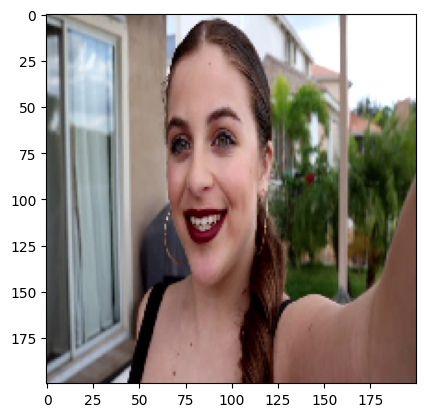

In [ ]:
img_path = '/content/my_data/Train/woman/19_1_4_20170109192214298.jpg'
img = image.load_img(img_path, target_size=(200, 200))
plt.imshow(img)


In [ ]:
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr /= 255.

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 96)      2688      
                                                                 
 batch_normalization_12 (Ba  (None, 198, 198, 96)      384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 99, 99, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 95, 95, 128)       307328    
                                                                 
 batch_normalization_13 (Ba  (None, 95, 95, 128)       512       
 tchNormalization)                                               
                                                      

In [ ]:
# Номера сверточных слоев - 0, 3, 6
cut_model = Model(inputs=model.input, outputs=model.layers[3].output)

In [ ]:
activation = cut_model.predict(img_arr)

1/1 [==============================] - 0s 83ms/step


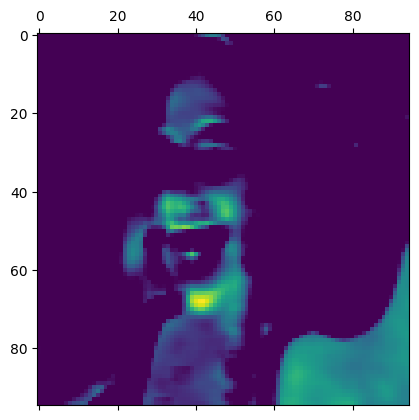

In [ ]:

plt.matshow(activation[0, :, :, 18], cmap='viridis')

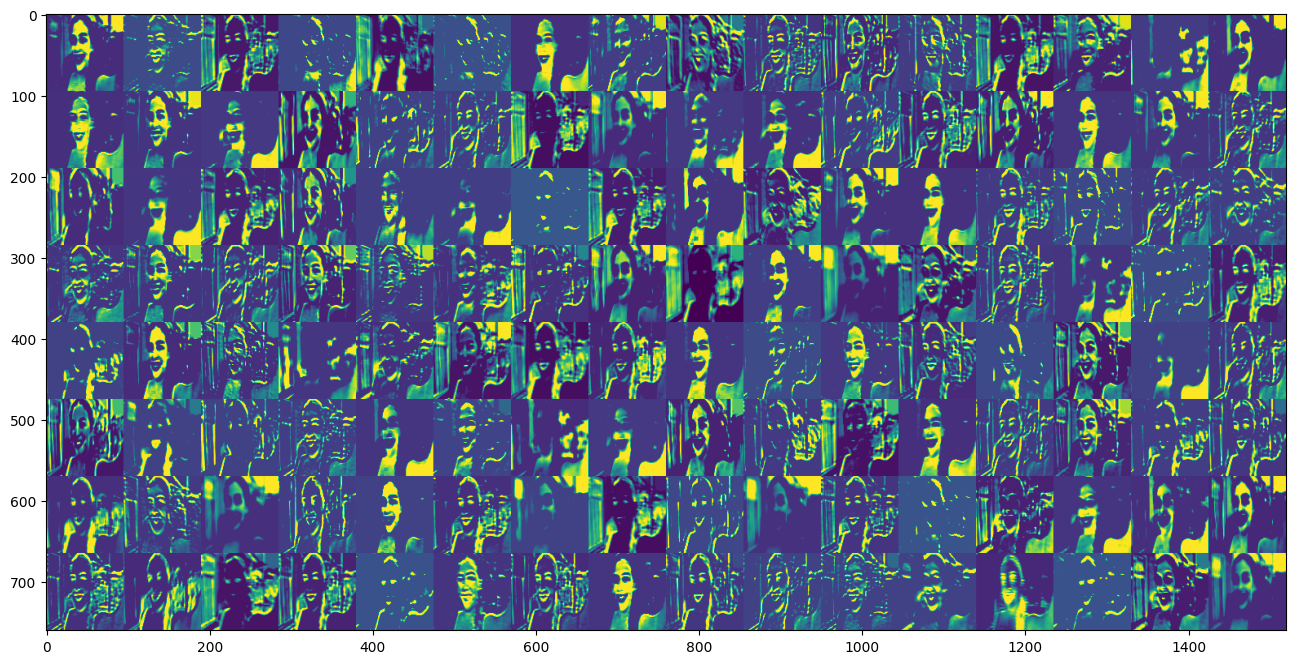

In [ ]:
images_per_row = 16
n_filters = activation.shape[-1]
size = activation.shape[1]
n_cols = n_filters // images_per_row
display_grid = np.zeros((n_cols * size, images_per_row * size))

for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = activation[0, :, :, col * images_per_row + row]
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')



In [ ]:
print(model.predict(img_arr))

1/1 [==============================] - 0s 19ms/step
[[0.]]


# Сохранение данных на диск

In [ ]:
import os # Импорт библиотеки для работы с операционной системой
import zipfile # Импорт библиотеки для работы с ZIP-архивами
import shutil # функции высокого уровня для работы с файлами и коллекциями файлов

with zipfile.ZipFile('save.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk('/content/my_data/Models'):
        for file in files:
            zipf.write(os.path.join(root, file))

    # Загрузка архива 'save.zip' на Google Drive
    shutil.move('save.zip', '/content/drive/MyDrive/CourseWork/Models/save.zip')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/CourseWork/Models/save.zip'

In [ ]:
print(model.summory())